<a href="https://colab.research.google.com/github/norannali/House_Price_Prediction/blob/main/House_Price_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"noranali88","key":"23aa0eedd422182b608242bb879f5163"}'}

In [3]:
import os
import json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 79.3MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/house-prices-advanced-regression-techniques.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# **Importing Librarys**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Loading Datasets**

In [7]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [8]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

# **EDA**

In [10]:
df_train.shape

(1460, 81)

In [11]:
df_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [12]:
years = ["YrSold","GarageYrBlt","YearRemodAdd","YearBuilt"]
df_train[years].head()

YrSold  GarageYrBlt  YearRemodAdd  YearBuilt
0    2008       2003.0          2003       2003
1    2007       1976.0          1976       1976
2    2008       2001.0          2002       2001
3    2006       1998.0          1970       1915
4    2008       2000.0          2000       2000

In [13]:
#convert year
from datetime import datetime
today=datetime.now().year
def convert_to_age(df,year_cols, current_year=today):
  for col in year_cols:
    df[col+'_Age']=df[col].apply(lambda x: current_year - x if pd.notna(x) else None)
  return df

In [14]:
convert_to_age(df_train,years,current_year=today)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... MiscVal MoSold YrSold SaleType SaleCondition  \
0            Lvl    AllPub  ...       0      2   2008       WD        Normal   
1            Lvl    AllPub  ...       0      5   2007       WD        Normal   
2            Lvl    AllPub  ...       0      9   2008       WD        Normal   
3            Lvl    AllPub  ...       0      2   2006       WD       Abnorml   
4            Lvl    AllPub  ...       0     12   2008       WD        Normal   
...          ...       ...  ...     ...    ...    ...      ...           ...   
1455         Lvl    AllPub  ...       0      8   2007       WD        Normal   
1456         Lvl    AllPub  ...       0      2   2010       WD        Normal   
1457         Lvl    AllPub  ...    2500      5   2010       WD        Normal   
1458         Lvl    AllPub  ...       0      4   2010       WD        Normal   
1459         Lvl    AllPub  ...       0      6   2008       WD        Normal   

     SalePrice YrSold_Age  GarageYrBlt_Age  YearRemodAdd_Age  YearBuilt_Age  
0       208500         17             22.0                22             22  
1       181500         18             49.0                49             49  
2       223500         17             24.0                23             24  
3       140000         19             27.0                55            110  
4       250000         17             25.0                25             25  
...        ...        ...              ...               ...            ...  
1455    175000         18             26.0                25             26  
1456    210000         15             47.0                37             47  
1457    266500         15             84.0                19             84  
1458    142125         15             75.0                29             75  
1459    147500         17             60.0                60             60  

[1460 rows x 85 columns]

In [15]:
convert_to_age(df_test,years,current_year=today)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0            Lvl    AllPub  ...         NaN       0      6   2010       WD   
1            Lvl    AllPub  ...        Gar2   12500      6   2010       WD   
2            Lvl    AllPub  ...         NaN       0      3   2010       WD   
3            Lvl    AllPub  ...         NaN       0      6   2010       WD   
4            HLS    AllPub  ...         NaN       0      1   2010       WD   
...          ...       ...  ...         ...     ...    ...    ...      ...   
1454         Lvl    AllPub  ...         NaN       0      6   2006       WD   
1455         Lvl    AllPub  ...         NaN       0      4   2006       WD   
1456         Lvl    AllPub  ...         NaN       0      9   2006       WD   
1457         Lvl    AllPub  ...        Shed     700      7   2006       WD   
1458         Lvl    AllPub  ...         NaN       0     11   2006       WD   

     SaleCondition YrSold_Age  GarageYrBlt_Age  YearRemodAdd_Age  \
0           Normal         15             64.0                64   
1           Normal         15             67.0                67   
2           Normal         15             28.0                27   
3           Normal         15             27.0                27   
4           Normal         15             33.0                33   
...            ...        ...              ...               ...   
1454        Normal         19              NaN                55   
1455       Abnorml         19             55.0                55   
1456       Abnorml         19             65.0                29   
1457        Normal         19              NaN                33   
1458        Normal         19             32.0                31   

      YearBuilt_Age  
0                64  
1                67  
2                28  
3                27  
4                33  
...             ...  
1454             55  
1455             55  
1456             65  
1457             33  
1458             32  

[1459 rows x 84 columns]

In [16]:
df_train.drop(years,axis=1,inplace=True)
df_test.drop(years,axis=1,inplace=True)

In [151]:
# Ensure both datasets have the same features
missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # Fill missing columns with a default value


In [152]:
# Print to verify that columns are now matching
print("✅ Age features added and datasets aligned successfully!")

✅ Age features added and datasets aligned successfully!


In [17]:
df_train.shape

(1460, 81)

In [18]:
  #If there are a large number of columns, pandas may truncate some of them with (...).
with pd.option_context('display.max_rows', None):
     print(df_train.dtypes)

Id                    int64
MSSubClass            int64
MSZoning             object
LotFrontage         float64
LotArea               int64
Street               object
Alley                object
LotShape             object
LandContour          object
Utilities            object
LotConfig            object
LandSlope            object
Neighborhood         object
Condition1           object
Condition2           object
BldgType             object
HouseStyle           object
OverallQual           int64
OverallCond           int64
RoofStyle            object
RoofMatl             object
Exterior1st          object
Exterior2nd          object
MasVnrType           object
MasVnrArea          float64
ExterQual            object
ExterCond            object
Foundation           object
BsmtQual             object
BsmtCond             object
BsmtExposure         object
BsmtFinType1         object
BsmtFinSF1            int64
BsmtFinType2         object
BsmtFinSF2            int64
BsmtUnfSF           

In [19]:
with pd.option_context('display.max_rows', None):
     print(df_train.isnull().sum())

Id                     0
MSSubClass             0
MSZoning               0
LotFrontage          259
LotArea                0
Street                 0
Alley               1369
LotShape               0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
HouseStyle             0
OverallQual            0
OverallCond            0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType           872
MasVnrArea             8
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual              37
BsmtCond              37
BsmtExposure          38
BsmtFinType1          37
BsmtFinSF1             0
BsmtFinType2          38
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0
CentralAir             0


In [20]:
df_train['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [21]:
dropped_columns=['PoolQC','Fence','MiscFeature','PoolArea','MasVnrType','Alley']

In [22]:
df_train.drop(dropped_columns,axis=1,inplace=True)
df_test.drop(dropped_columns,axis=1,inplace=True)

In [23]:
df_train['FireplaceQu'].fillna('NA',inplace=True)
df_test['FireplaceQu'].fillna('NA',inplace=True)

In [24]:
df_train['GarageYrBlt_Age'].fillna(0,inplace=True)
df_test['GarageYrBlt_Age'].fillna(0,inplace=True)

In [25]:
df_train['LotFrontage'].fillna(df_train.LotFrontage.median(),inplace=True)
df_test['LotFrontage'].fillna(df_test.LotFrontage.median(),inplace=True)

In [26]:
for col in ['MasVnrArea','Electrical']:
  mode_val=df_train[col].mode()[0]


  df_train[col].fillna(mode_val,inplace=True)
  df_test[col].fillna(mode_val,inplace=True)

In [27]:
categorical_col=['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']

In [28]:
def fill_missing_val_with_NA(df,cols):
  for col in cols:
    df[col]=df[col].fillna('NA')
  return df

In [29]:
fill_missing_val_with_NA(df_train,categorical_col)
fill_missing_val_with_NA(df_test,categorical_col)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch MiscVal  \
0            Lvl    AllPub    Inside  ...         0         120       0   
1            Lvl    AllPub    Corner  ...         0           0   12500   
2            Lvl    AllPub    Inside  ...         0           0       0   
3            Lvl    AllPub    Inside  ...         0           0       0   
4            HLS    AllPub    Inside  ...         0         144       0   
...          ...       ...       ...  ...       ...         ...     ...   
1454         Lvl    AllPub    Inside  ...         0           0       0   
1455         Lvl    AllPub    Inside  ...         0           0       0   
1456         Lvl    AllPub    Inside  ...         0           0       0   
1457         Lvl    AllPub    Inside  ...         0           0     700   
1458         Lvl    AllPub    Inside  ...         0           0       0   

     MoSold SaleType SaleCondition  YrSold_Age  GarageYrBlt_Age  \
0         6       WD        Normal          15             64.0   
1         6       WD        Normal          15             67.0   
2         3       WD        Normal          15             28.0   
3         6       WD        Normal          15             27.0   
4         1       WD        Normal          15             33.0   
...     ...      ...           ...         ...              ...   
1454      6       WD        Normal          19              0.0   
1455      4       WD       Abnorml          19             55.0   
1456      9       WD       Abnorml          19             65.0   
1457      7       WD        Normal          19              0.0   
1458     11       WD        Normal          19             32.0   

     YearRemodAdd_Age YearBuilt_Age  
0                  64            64  
1                  67            67  
2                  27            28  
3                  27            27  
4                  33            33  
...               ...           ...  
1454               55            55  
1455               55            55  
1456               29            65  
1457               33            33  
1458               31            32  

[1459 rows x 74 columns]

In [30]:
df_train.isnull().sum().any()

False

In [31]:
for col in df_test.select_dtypes(include = "O").columns:
    print(col,df_test[col].unique())

MSZoning ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities ['AllPub' nan]
LotConfig ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Condition1 ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
Condition2 ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
BldgType ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
RoofMatl ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
Exterior1st ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'A

In [32]:
for col in df_test.select_dtypes(include = "O").columns:
    mode_value = df_test[col].mode()[0]

    df_test[col].fillna(mode_value, inplace=True)

In [33]:
for col in df_test.select_dtypes(include = "number").columns:
  df_test[col].fillna(df_test[col].median(), inplace=True)

In [34]:
df_test.isnull().sum().any()

False

In [35]:
df_train.duplicated().sum()

0

In [36]:
df_train.shape

(1460, 75)

In [37]:
df_train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   

  Utilities LotConfig  ... ScreenPorch MiscVal MoSold SaleType SaleCondition  \
0    AllPub    Inside  ...           0       0      2       WD        Normal   
1    AllPub       FR2  ...           0       0      5       WD        Normal   
2    AllPub    Inside  ...           0       0      9       WD        Normal   

  SalePrice  YrSold_Age  GarageYrBlt_Age YearRemodAdd_Age YearBuilt_Age  
0    208500          17             22.0               22            22  
1    181500          18             49.0               49            49  
2    223500          17             24.0               23            24  

[3 rows x 75 columns]

# **Analyze Categorical Data**
**Understanding categorical data is essential for:**
* ✅ Identifying data distribution
* ✅ Detecting rare categories that might impact predictions
* ✅ Checking for missing or inconsistent values
* ✅ Understanding relationships between features

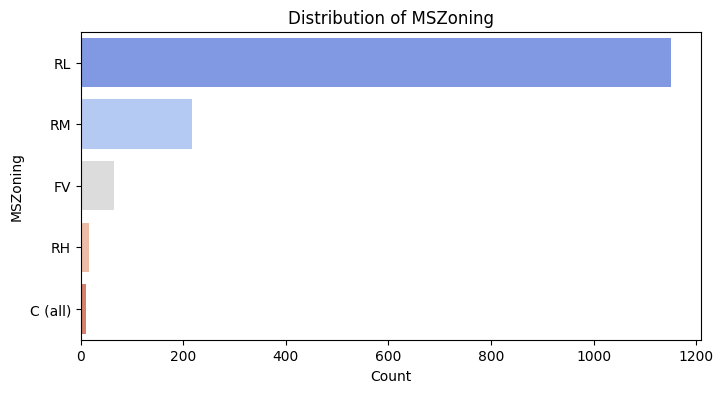

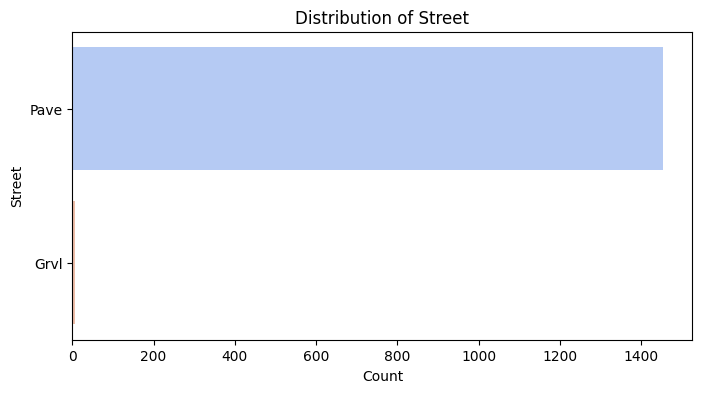

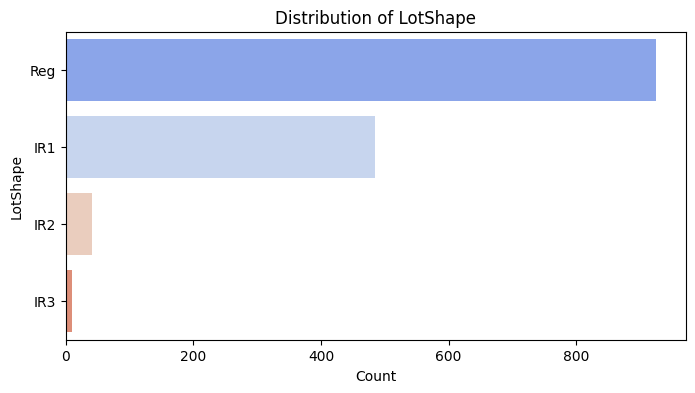

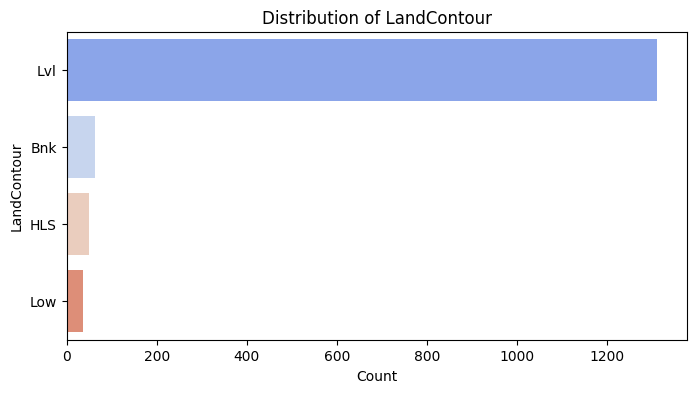

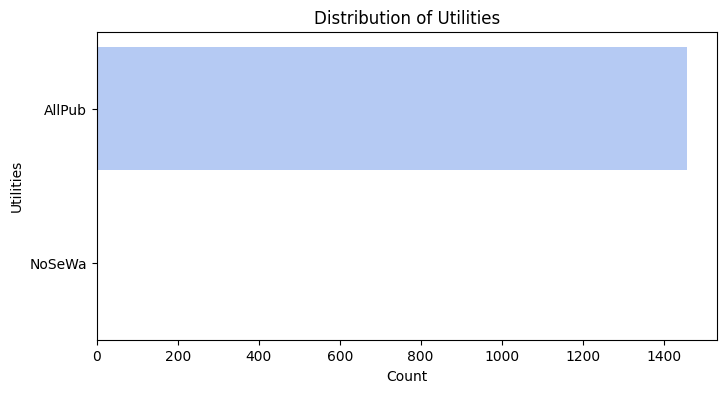

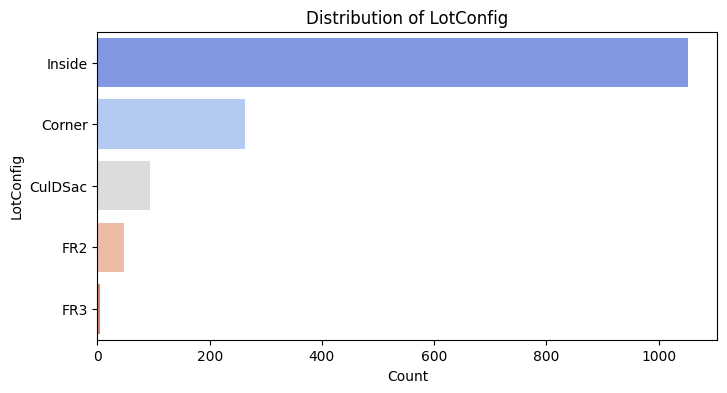

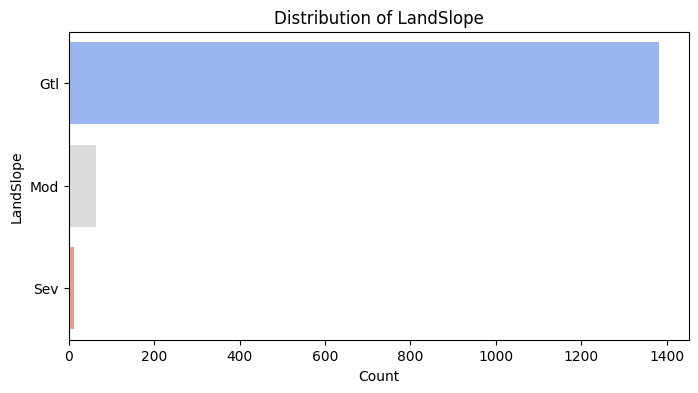

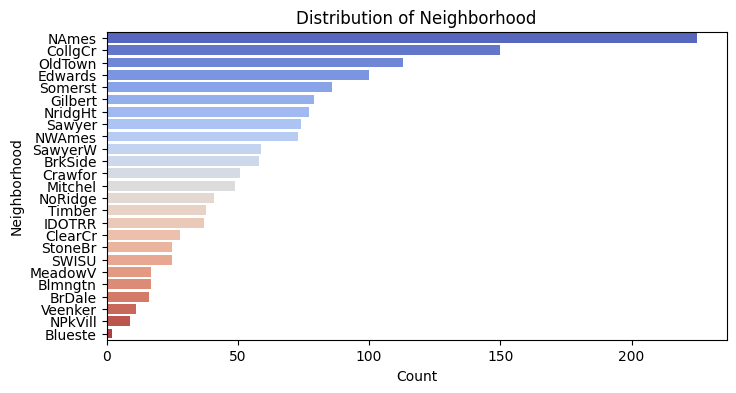

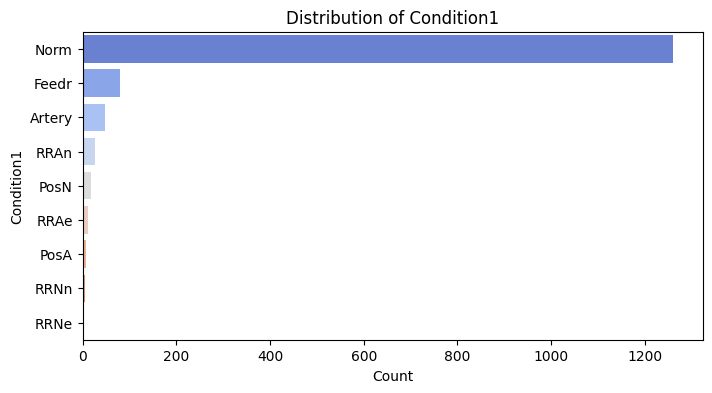

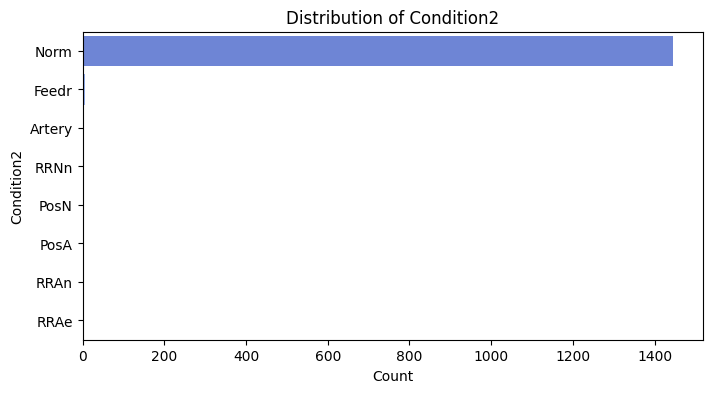

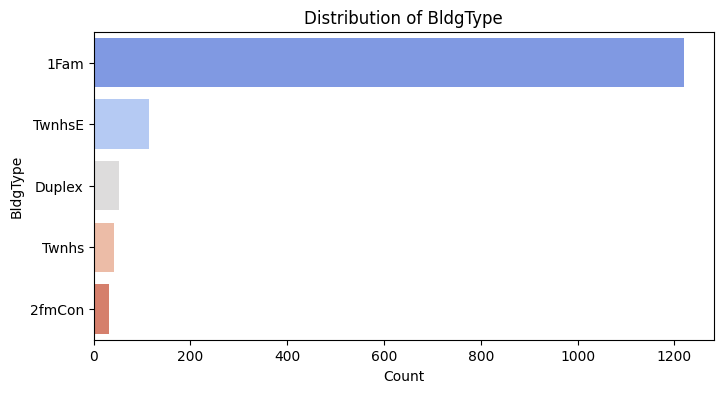

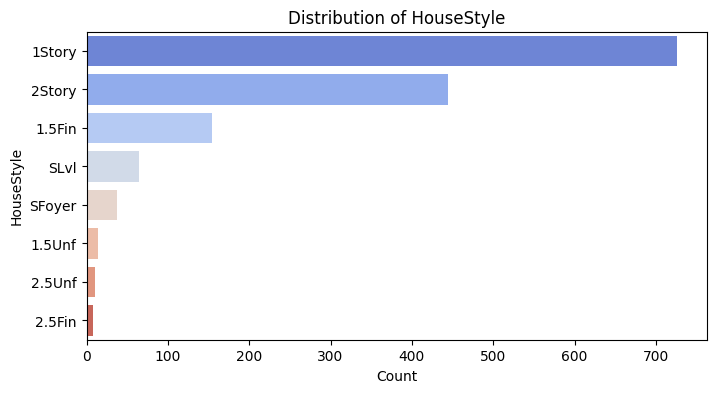

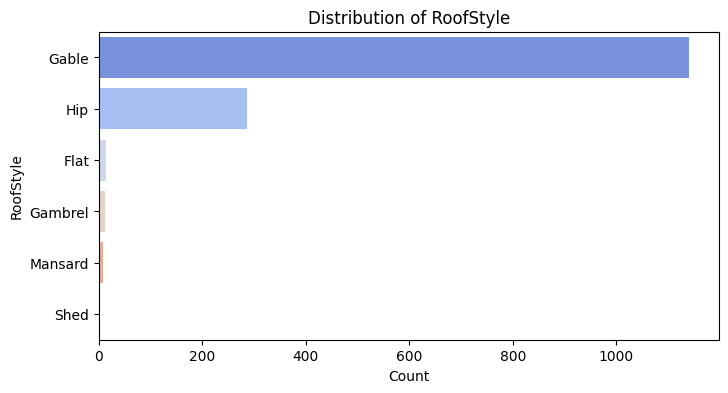

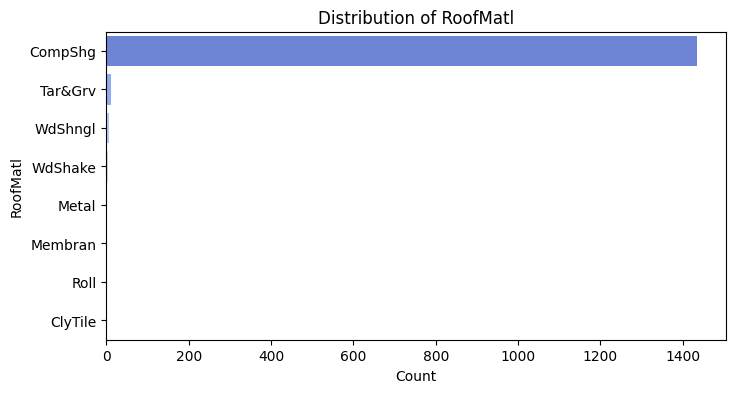

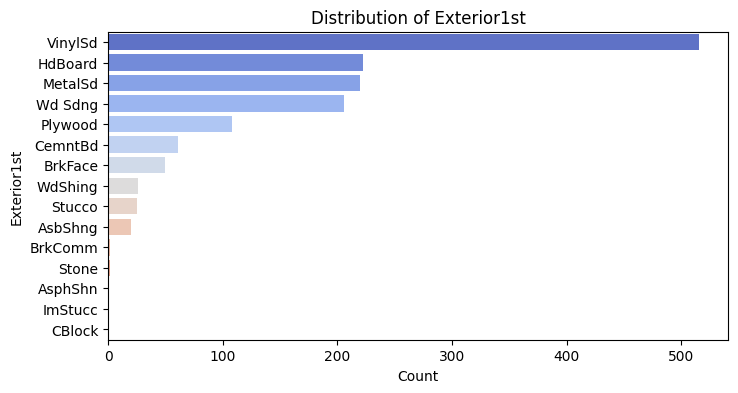

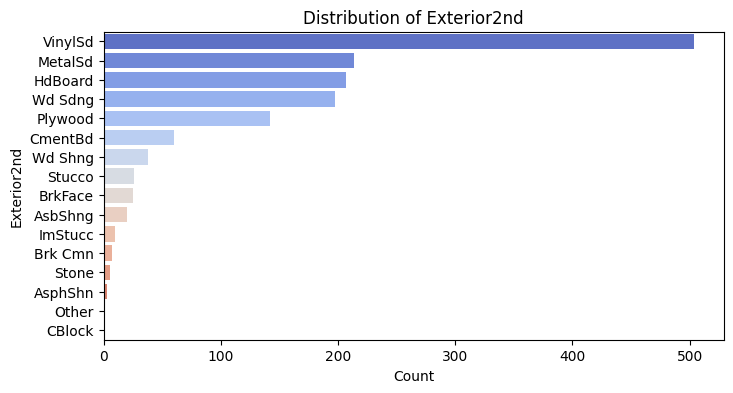

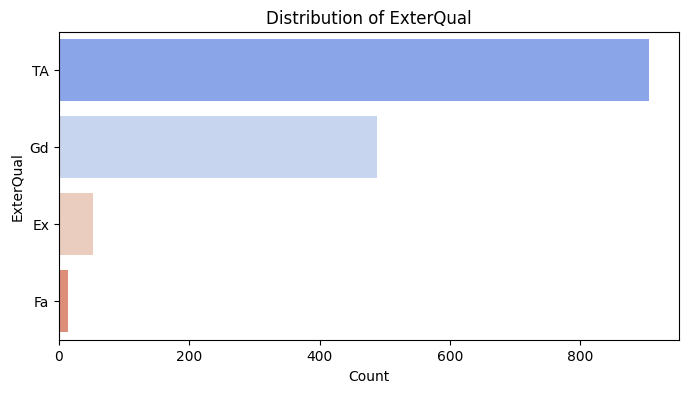

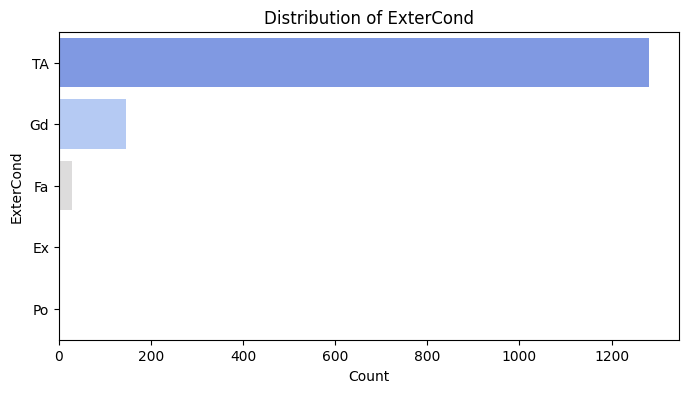

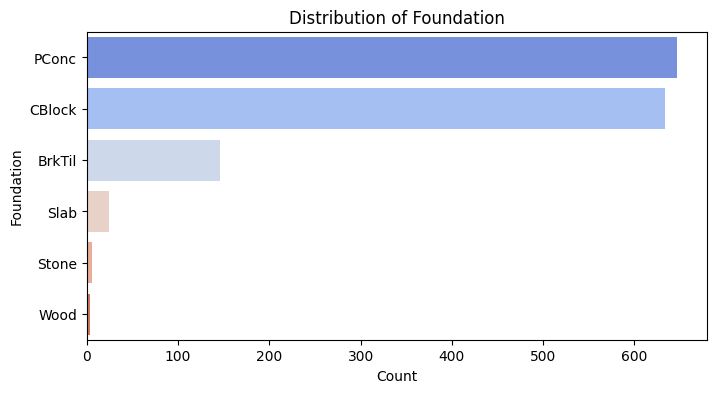

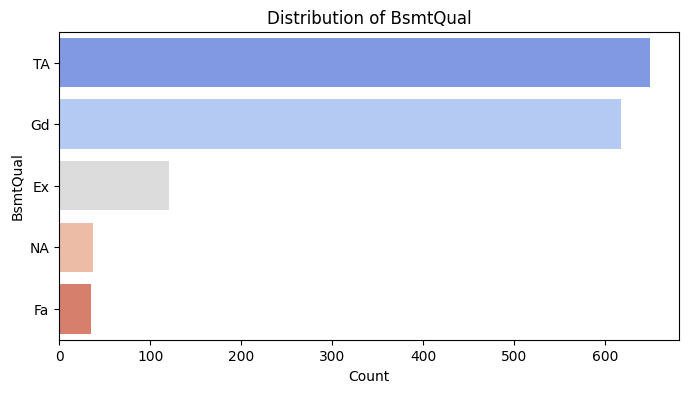

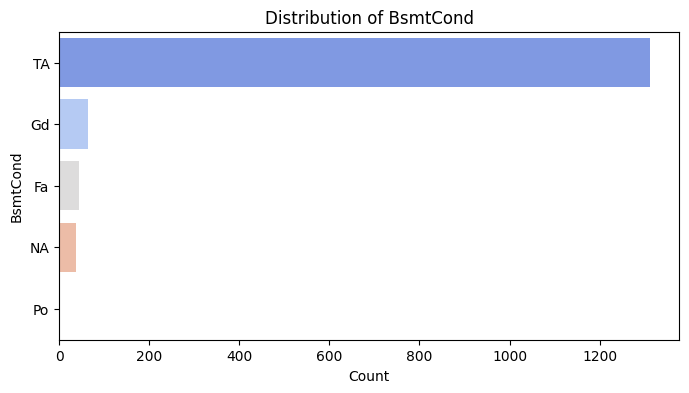

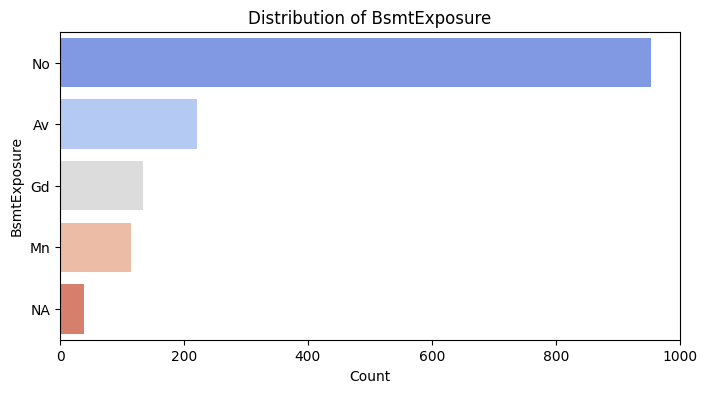

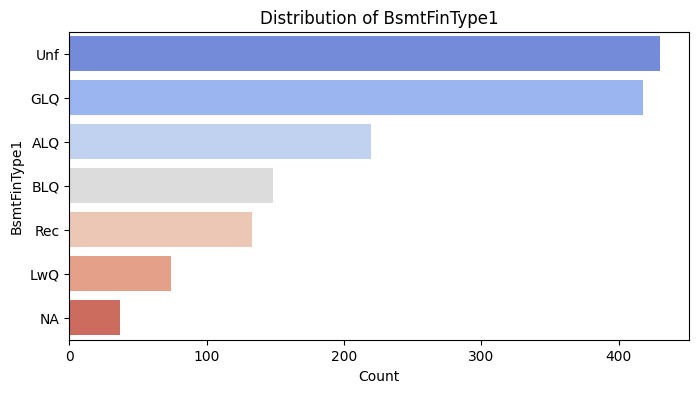

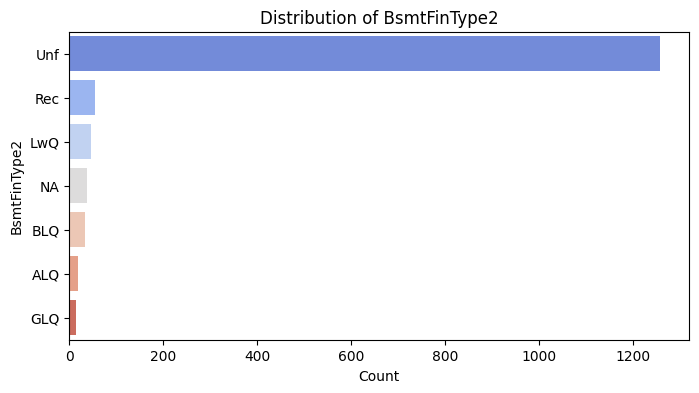

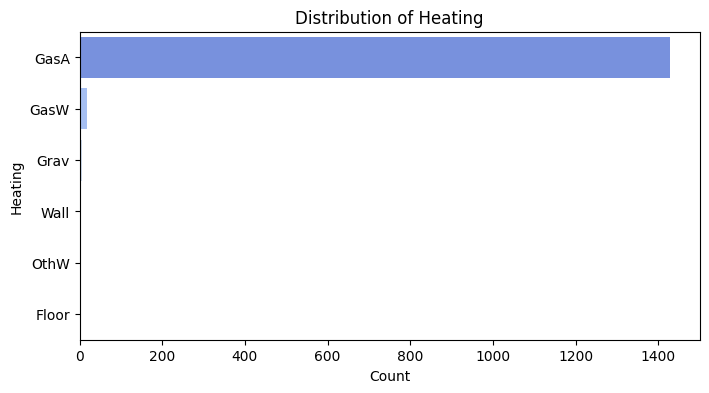

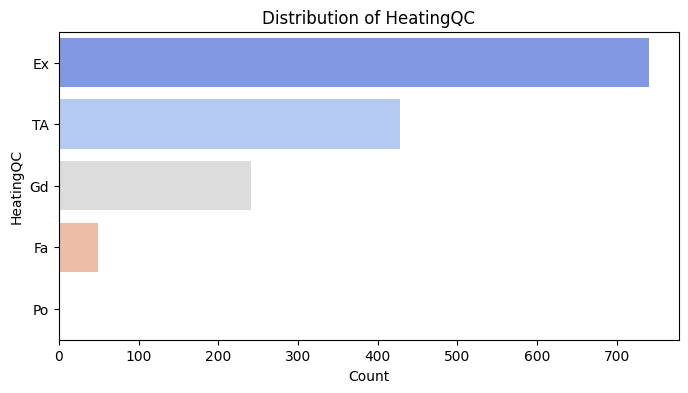

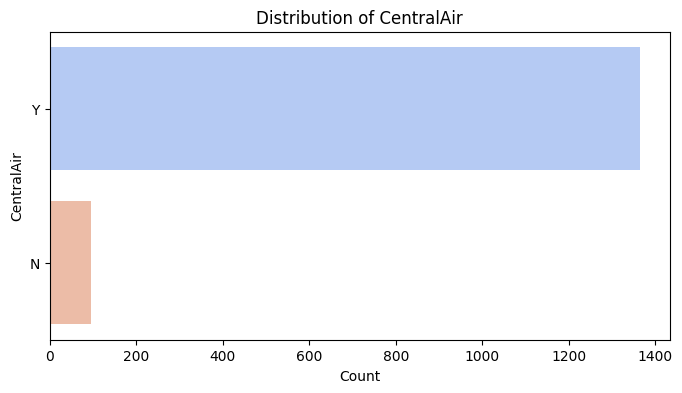

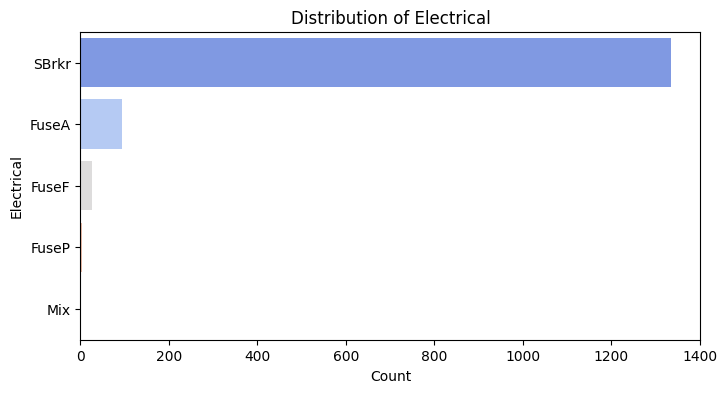

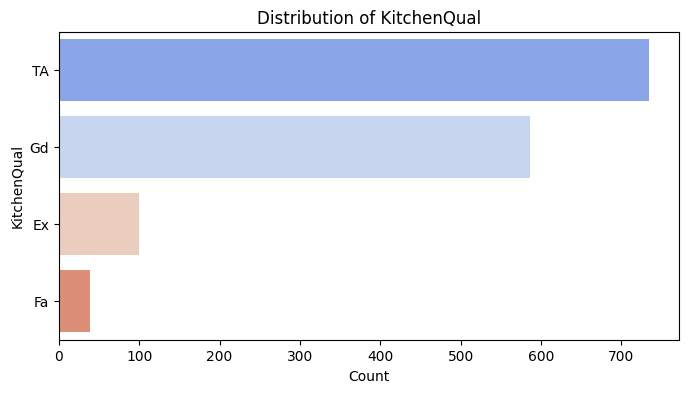

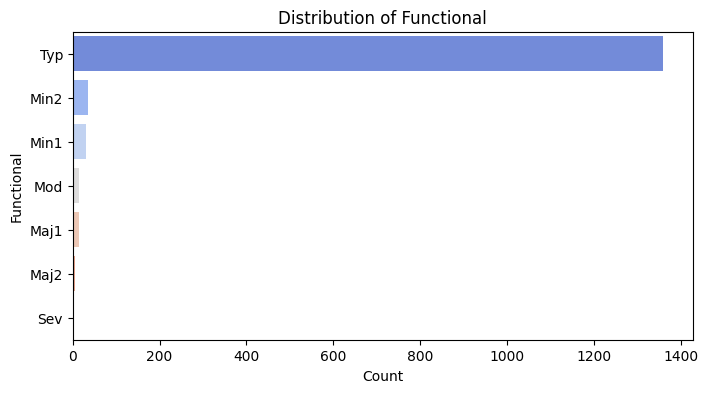

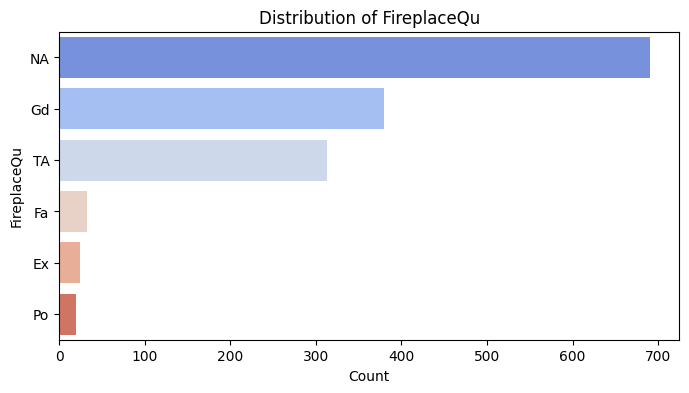

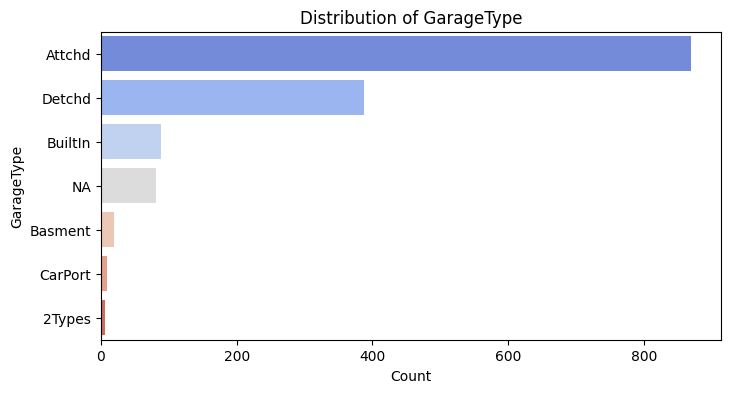

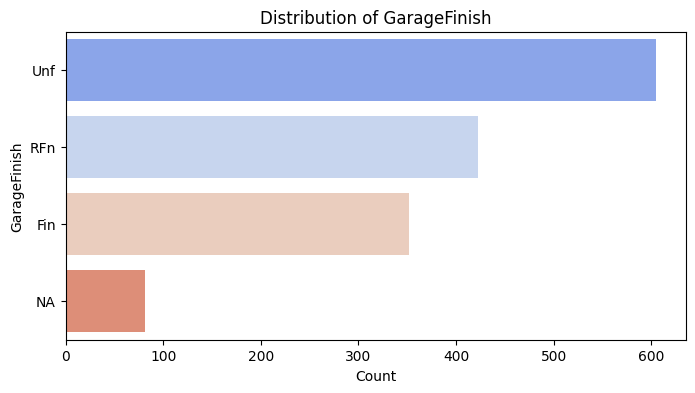

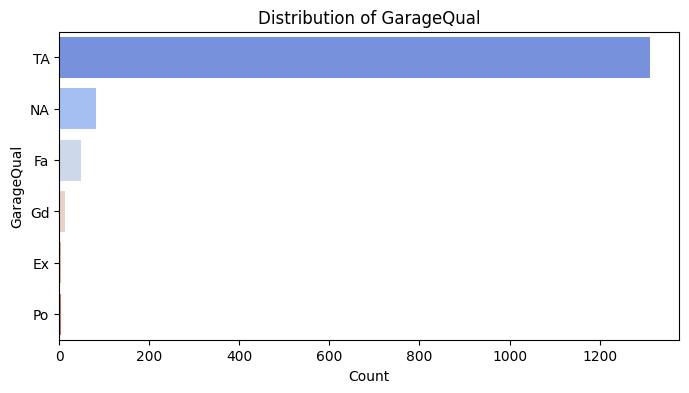

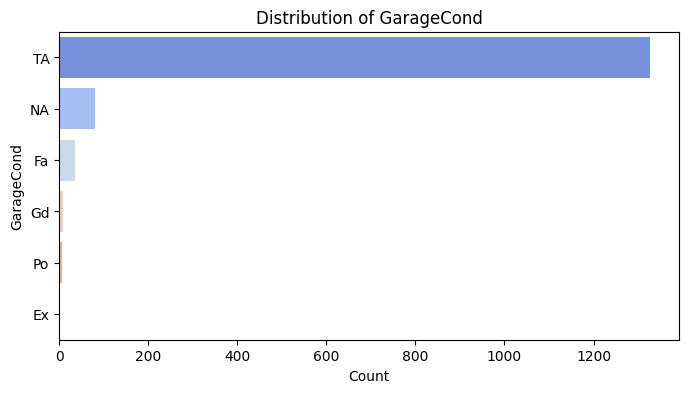

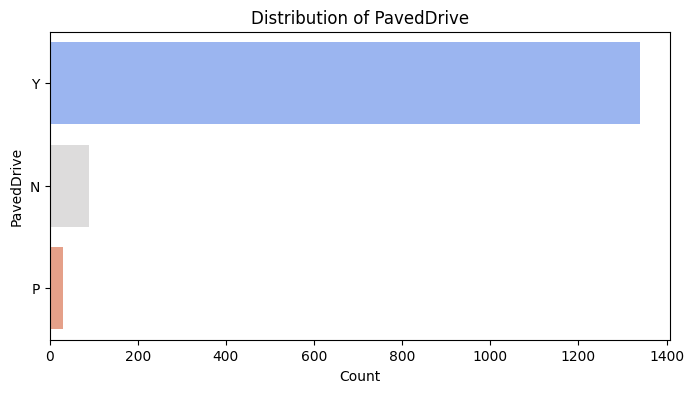

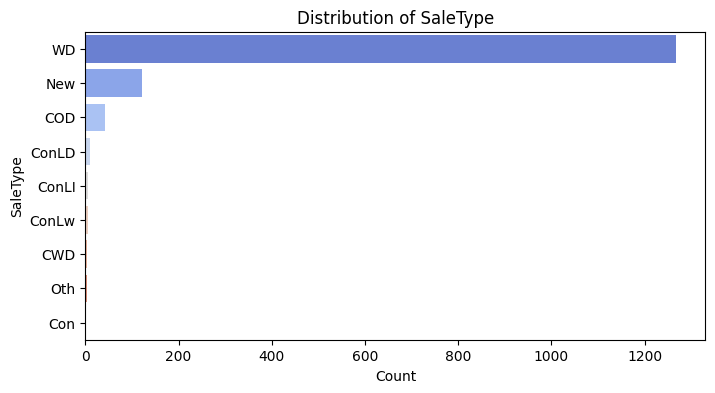

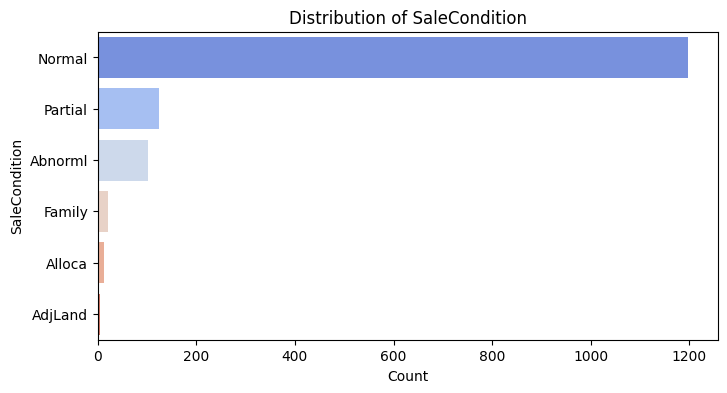

In [38]:
# Function to visualize categorical features
def plot_categorical_features(df, categorical_cols):
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

# List of categorical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

# Call the function
plot_categorical_features(df_train, categorical_cols)

In [39]:
categorical_cols = df_train.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Percentage of categories in {col}:")
    print(df_train[col].value_counts(normalize=True) * 100)
    print("-" * 40)  # Separator for readability


Percentage of categories in MSZoning:
MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in Street:
Street
Pave    99.589041
Grvl     0.410959
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in LotShape:
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in LandContour:
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in Utilities:
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in LotConfig:
LotConfig
Inside     72.054795
Corn

In [40]:
categorical_cols = df_test.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Percentage of categories in {col}:")
    print(df_test[col].value_counts(normalize=True) * 100)
    print("-" * 40)  # Separator for readability

Percentage of categories in MSZoning:
MSZoning
RL         76.627827
RM         16.586703
FV          5.071967
C (all)     1.028101
RH          0.685401
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in Street:
Street
Pave    99.588759
Grvl     0.411241
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in LotShape:
LotShape
Reg    64.016450
IR1    33.173406
IR2     2.398903
IR3     0.411241
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in LandContour:
LandContour
Lvl    89.856066
HLS     4.797807
Bnk     3.701165
Low     1.644962
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in Utilities:
Utilities
AllPub    100.0
Name: proportion, dtype: float64
----------------------------------------
Percentage of categories in LotConfig:
LotConfig
Inside     74.091844
Corner     16.997944
CulDSac

# **Dropping Categorical Columns with Imbalanced Distribution**
**These columns provide no meaningful information for prediction because:**
* ✅ Low variability (almost all values are the same).
* ✅ Not useful for distinguishing different houses in the dataset.
* ✅ Removing them reduces dimensionality without losing valuable information.

In [41]:
dropped_Cols=['Heating','RoofMatl','Condition2','Utilities','Street']

In [42]:
df_test.drop(dropped_Cols,axis=1,inplace=True)
df_train.drop(dropped_Cols,axis=1,inplace=True)

# **Analyzing Numeric Columns**
**analyzing numeric features. This helps in:**
* ✅ Understanding data distribution
* ✅ Detecting outliers
* ✅ Identifying correlations
* ✅ Handling skewness

In [43]:
def plot_numeric_distributions(df):
    sns.set_style("whitegrid")
    sns.set_palette("Set2")  # Use a predefined color palette

    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Set up the size of the plot grid
    num_cols = len(numeric_cols)
    num_rows = (num_cols // 3) + 1  # 3 plots per row

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    # Generate unique colors for each plot
    colors = sns.color_palette("husl", num_cols)

    # Loop through each numeric column and create a distribution plot
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, color=colors[i], bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='darkblue')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        axes[i].grid(True, linestyle='--', alpha=0.6)  # Add light grid lines

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and show the plots
    plt.tight_layout(pad=3.0)
    plt.show()

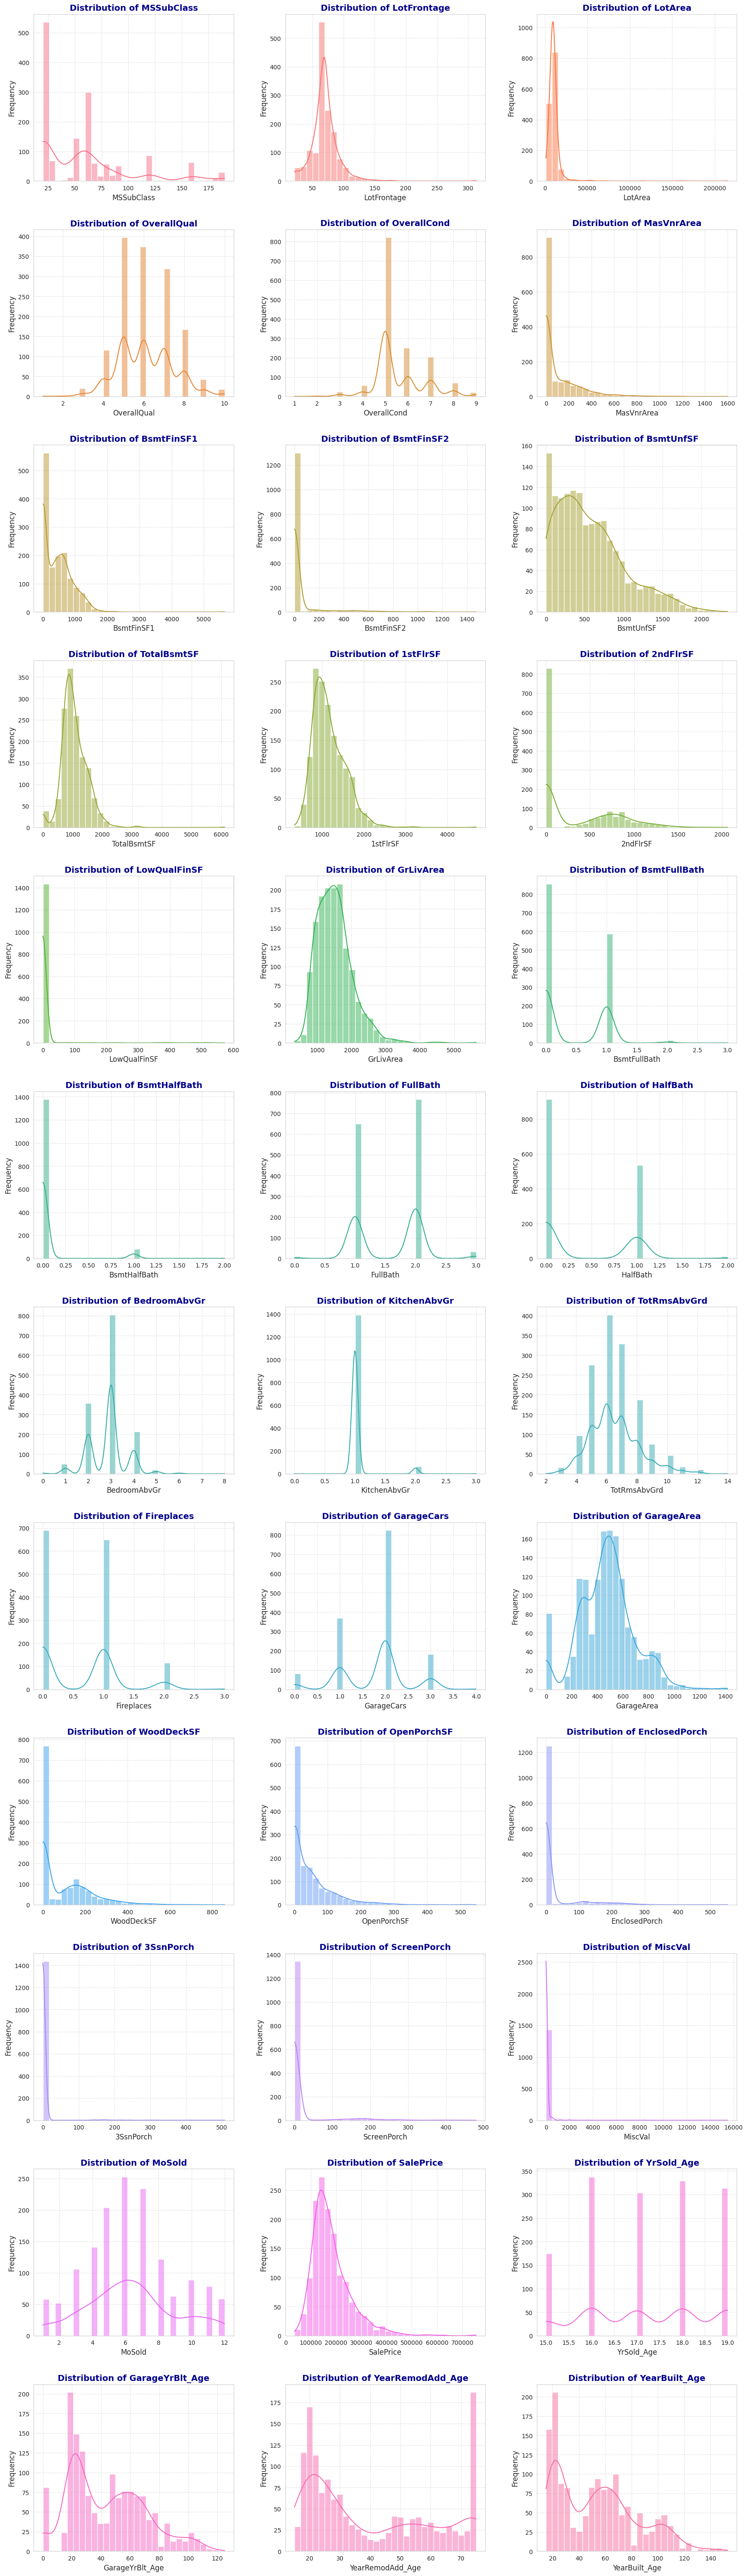

In [44]:
plot_numeric_distributions(df_train.drop("Id", axis=1))

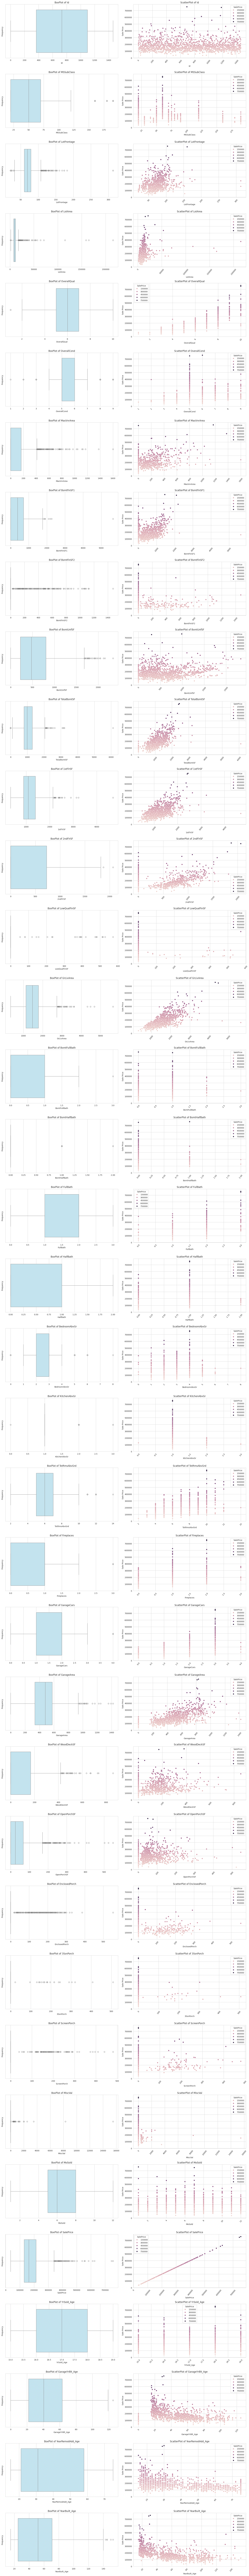

In [45]:
num_col=df_train.select_dtypes(include=['number']).columns
col_lens=len(num_col)
rows=col_lens
fig, axes = plt.subplots(rows, 2, figsize=(18, 5 * rows))

#visulize box_plot,scatter_plot
for i, col in enumerate(num_col):
    sns.boxplot(data=df_train,x=col,color='#BCE7F5', ax=axes[i, 0])
    axes[i,0].set_title(f'BoxPlot of {col}')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Frequency')

    sns.scatterplot(data=df_train,x=col,y='SalePrice',hue='SalePrice',color='#344CB7', ax=axes[i, 1])
    axes[i,1].set_title(f'ScatterPlot of {col}')
    axes[i,1].set_xlabel(col)
    axes[i,1].set_ylabel('Sale Price')
    axes[i, 1].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()


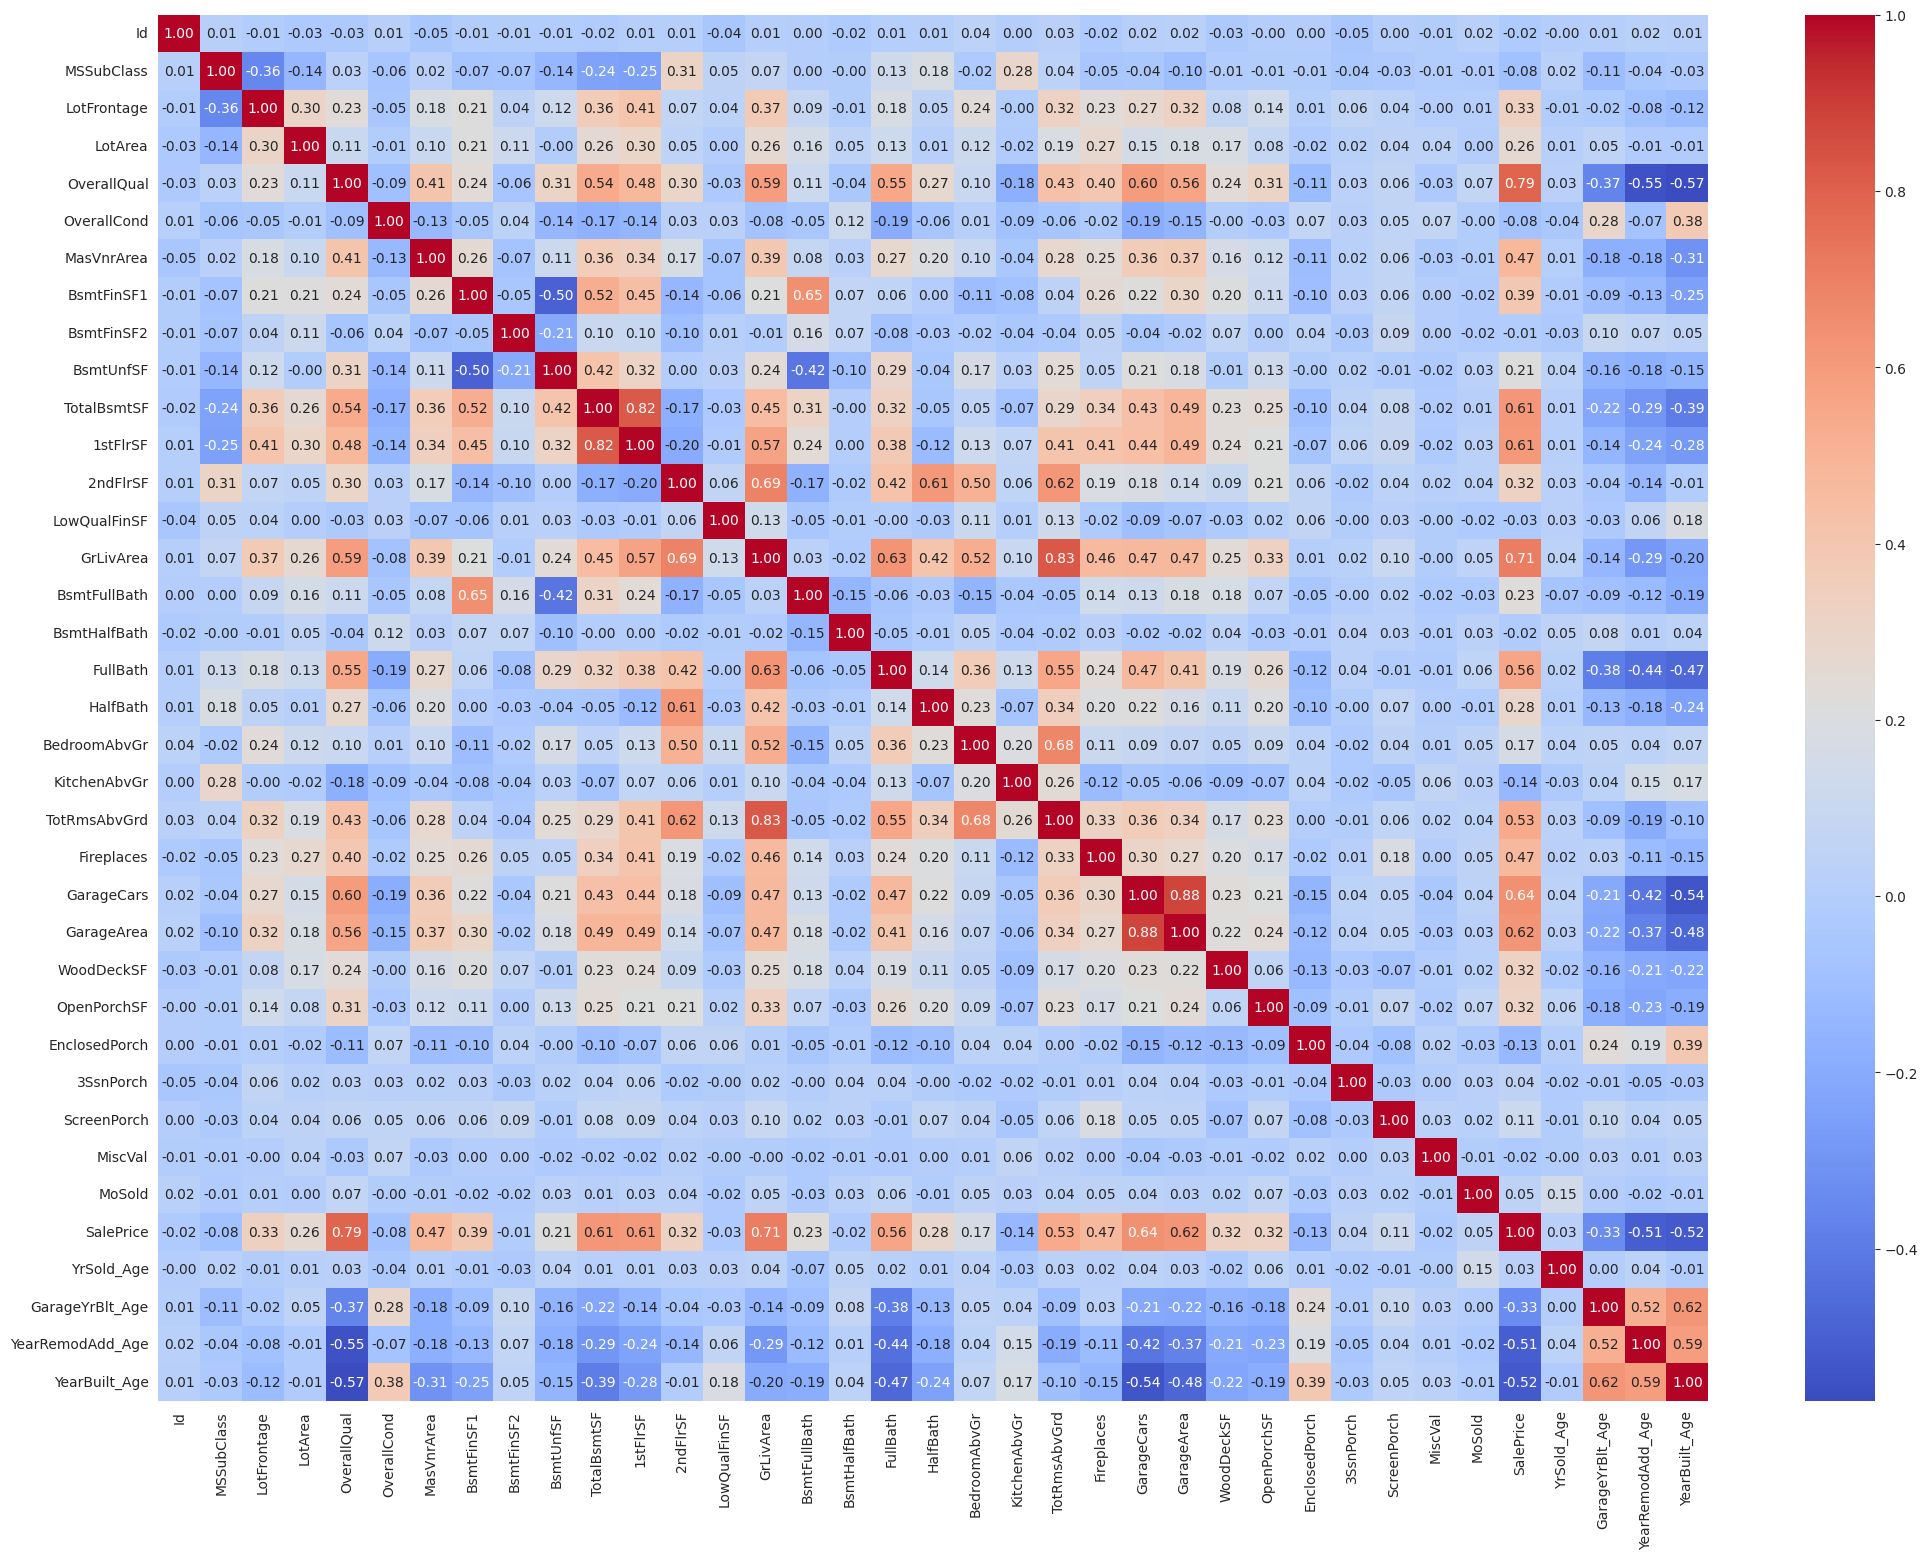

In [46]:
plt.figure(figsize=(25, 18))
numeric_df = df_train.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [47]:
df_train.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

In [48]:
df_train.drop(['3SsnPorch','LowQualFinSF'],axis=1,inplace=True)
df_test.drop(['3SsnPorch','LowQualFinSF'],axis=1,inplace=True)

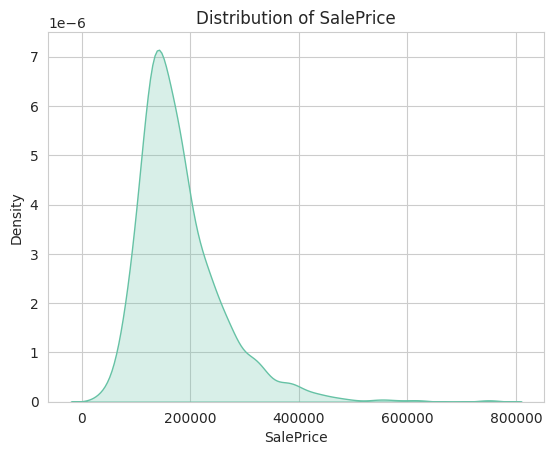

In [49]:
sns.kdeplot(df_train['SalePrice'], fill=True)
plt.title("Distribution of SalePrice")
plt.show()

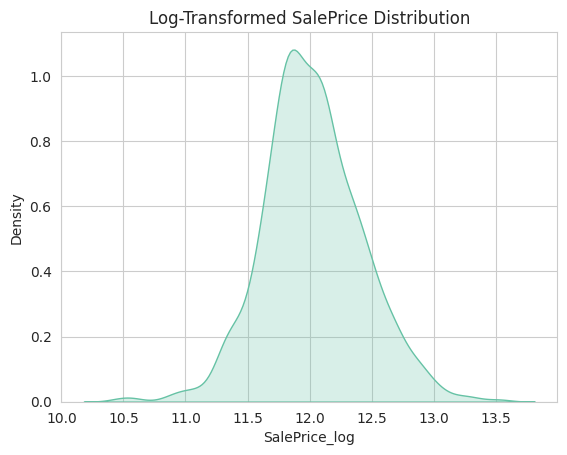

In [50]:
df_train['SalePrice_log'] = np.log1p(df_train['SalePrice'])  # log1p avoids log(0) errors

sns.kdeplot(df_train['SalePrice_log'], fill=True)
plt.title("Log-Transformed SalePrice Distribution")
plt.show()

In [51]:
from scipy.stats import skew

print("Skewness before transformation:", skew(df_train['SalePrice']))
print("Skewness after transformation:", skew(df_train['SalePrice_log']))


Skewness before transformation: 1.880940746034036
Skewness after transformation: 0.12122191311528363


# **Analyze Categorical Feature Hierarchy**
**1️⃣ Examining Feature Descriptions and Contents**

* Extract unique values from categorical columns.
* Identify whether these values represent a ranking (e.g., quality levels) or are purely categorical.

**2️⃣ Analyzing the Impact on Sale Price**

* Use groupby() to examine the relationship between categories and SalePrice.
* Check for increasing or decreasing trends in average sale price per category.
* If a clear order exists, use Ordinal Encoding; otherwise, use One-Hot Encoding.

**3️⃣ Deciding the Encoding Strategy**

* Ordinal Encoding → Features with a clear ranking (e.g., Poor → Excellent).
* One-Hot Encoding → Features without an inherent order (e.g., Neighborhoods, GarageType).

In [52]:
categorical_cols = df_train.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nFeature: {col}")
    print(df_train[col].unique())



Feature: MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']

Feature: LotShape
['Reg' 'IR1' 'IR2' 'IR3']

Feature: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

Feature: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Feature: LandSlope
['Gtl' 'Mod' 'Sev']

Feature: Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Feature: Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Feature: BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Feature: HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

Feature: RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

Feature: Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'

In [53]:
for col in categorical_cols:
    grouped_data = df_train.groupby(col)['SalePrice'].mean().sort_values()
    print(f"\nFeature: {col}\n", grouped_data)


Feature: MSZoning
 MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         191004.994787
FV         214014.061538
Name: SalePrice, dtype: float64

Feature: LotShape
 LotShape
Reg    164754.818378
IR1    206101.665289
IR3    216036.500000
IR2    239833.365854
Name: SalePrice, dtype: float64

Feature: LandContour
 LandContour
Bnk    143104.079365
Lvl    180183.746758
Low    203661.111111
HLS    231533.940000
Name: SalePrice, dtype: float64

Feature: LotConfig
 LotConfig
Inside     176938.047529
FR2        177934.574468
Corner     181623.425856
FR3        208475.000000
CulDSac    223854.617021
Name: SalePrice, dtype: float64

Feature: LandSlope
 LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

Feature: Neighborhood
 Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793

**Ordinal Encoding (Ordered Categories)**

In [54]:
'''ordinal_col=['ExterCond','ExterQual','BsmtQual','BsmtCond','HeatingQC',
             'KitchenQual','FireplaceQu', 'GarageQual', 'GarageCond']

ordinal_mapping={'ExterCond':['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                 'ExterQual':['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                 'BsmtQual':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                 'BsmtCond':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                 'HeatingQC':['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                 'KitchenQual':['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                 'FireplaceQu':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                 'GarageQual':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                 'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
}
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_col])
df_train[ordinal_col] = ordinal_encoder.fit_transform(df_train[ordinal_col])'''

"ordinal_col=['ExterCond','ExterQual','BsmtQual','BsmtCond','HeatingQC',\n             'KitchenQual','FireplaceQu', 'GarageQual', 'GarageCond']\n\nordinal_mapping={'ExterCond':['Po', 'Fa', 'TA', 'Gd', 'Ex'],\n                 'ExterQual':['Po', 'Fa', 'TA', 'Gd', 'Ex'],\n                 'BsmtQual':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\n                 'BsmtCond':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\n                 'HeatingQC':['Po', 'Fa', 'TA', 'Gd', 'Ex'],\n                 'KitchenQual':['Po', 'Fa', 'TA', 'Gd', 'Ex'],\n                 'FireplaceQu':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\n                 'GarageQual':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\n                 'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']\n}\nfrom sklearn.preprocessing import OrdinalEncoder\nordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_col])\ndf_train[ordinal_col] = ordinal_encoder.fit_transform(df_train[ordinal_col])"

**One-Hot Encoding (Nominal Categories)**

In [55]:
df_train.head(3)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1  ... MiscVal MoSold  SaleType  \
0       Gtl      CollgCr       Norm  ...       0      2        WD   
1       Gtl      Veenker      Feedr  ...       0      5        WD   
2       Gtl      CollgCr       Norm  ...       0      9        WD   

   SaleCondition SalePrice YrSold_Age GarageYrBlt_Age  YearRemodAdd_Age  \
0         Normal    208500         17            22.0                22   
1         Normal    181500         18            49.0                49   
2         Normal    223500         17            24.0                23   

  YearBuilt_Age SalePrice_log  
0            22     12.247699  
1            49     12.109016  
2            24     12.317171  

[3 rows x 68 columns]

In [56]:
one_hot_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']

In [57]:
def replace_low_frequency_with_others(dataframe, columns, threshold=50):
    for col in columns:
        value_counts = dataframe[col].value_counts()
        low_frequency_values = value_counts[value_counts < threshold].index
        dataframe[col] = dataframe[col].replace(low_frequency_values, 'Other')
    return dataframe

In [58]:
replace_low_frequency_with_others(df_train, one_hot_cols, threshold=31)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... MiscVal MoSold  \
0       Inside       Gtl      CollgCr       Norm  ...       0      2   
1          FR2       Gtl        Other      Feedr  ...       0      5   
2       Inside       Gtl      CollgCr       Norm  ...       0      9   
3       Corner       Gtl      Crawfor       Norm  ...       0      2   
4          FR2       Gtl      NoRidge       Norm  ...       0     12   
...        ...       ...          ...        ...  ...     ...    ...   
1455    Inside       Gtl      Gilbert       Norm  ...       0      8   
1456    Inside       Gtl       NWAmes       Norm  ...       0      2   
1457    Inside       Gtl      Crawfor       Norm  ...    2500      5   
1458    Inside       Gtl        NAmes       Norm  ...       0      4   
1459    Inside       Gtl      Edwards       Norm  ...       0      6   

      SaleType  SaleCondition SalePrice YrSold_Age GarageYrBlt_Age  \
0           WD         Normal    208500         17            22.0   
1           WD         Normal    181500         18            49.0   
2           WD         Normal    223500         17            24.0   
3           WD        Abnorml    140000         19            27.0   
4           WD         Normal    250000         17            25.0   
...        ...            ...       ...        ...             ...   
1455        WD         Normal    175000         18            26.0   
1456        WD         Normal    210000         15            47.0   
1457        WD         Normal    266500         15            84.0   
1458        WD         Normal    142125         15            75.0   
1459        WD         Normal    147500         17            60.0   

      YearRemodAdd_Age YearBuilt_Age SalePrice_log  
0                   22            22     12.247699  
1                   49            49     12.109016  
2                   23            24     12.317171  
3                   55           110     11.849405  
4                   25            25     12.429220  
...                ...           ...           ...  
1455                25            26     12.072547  
1456                37            47     12.254868  
1457                19            84     12.493133  
1458                29            75     11.864469  
1459                60            60     11.901590  

[1460 rows x 68 columns]

In [59]:
replace_low_frequency_with_others(df_test, one_hot_cols, threshold=31)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             20    Other         80.0    11622      Reg         Lvl   
1             20       RL         81.0    14267      IR1         Lvl   
2             60       RL         74.0    13830      IR1         Lvl   
3             60       RL         78.0     9978      IR1         Lvl   
4            120       RL         43.0     5005      IR1         HLS   
...          ...      ...          ...      ...      ...         ...   
1454         160       RM         21.0     1936      Reg         Lvl   
1455         160       RM         21.0     1894      Reg         Lvl   
1456          20       RL        160.0    20000      Reg         Lvl   
1457          85       RL         62.0    10441      Reg         Lvl   
1458          60       RL         74.0     9627      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... EnclosedPorch  \
0       Inside       Gtl        NAmes      Feedr  ...             0   
1       Corner       Gtl        NAmes       Norm  ...             0   
2       Inside       Gtl      Gilbert       Norm  ...             0   
3       Inside       Gtl      Gilbert       Norm  ...             0   
4       Inside       Gtl        Other       Norm  ...             0   
...        ...       ...          ...        ...  ...           ...   
1454    Inside       Gtl        Other       Norm  ...             0   
1455    Inside       Gtl        Other       Norm  ...             0   
1456    Inside       Gtl      Mitchel       Norm  ...             0   
1457    Inside       Gtl      Mitchel       Norm  ...             0   
1458    Inside       Mod      Mitchel       Norm  ...             0   

     ScreenPorch  MiscVal  MoSold SaleType SaleCondition YrSold_Age  \
0            120        0       6       WD        Normal         15   
1              0    12500       6       WD        Normal         15   
2              0        0       3       WD        Normal         15   
3              0        0       6       WD        Normal         15   
4            144        0       1       WD        Normal         15   
...          ...      ...     ...      ...           ...        ...   
1454           0        0       6       WD        Normal         19   
1455           0        0       4       WD       Abnorml         19   
1456           0        0       9       WD       Abnorml         19   
1457           0      700       7       WD        Normal         19   
1458           0        0      11       WD        Normal         19   

      GarageYrBlt_Age YearRemodAdd_Age YearBuilt_Age  
0                64.0               64            64  
1                67.0               67            67  
2                28.0               27            28  
3                27.0               27            27  
4                33.0               33            33  
...               ...              ...           ...  
1454              0.0               55            55  
1455             55.0               55            55  
1456             65.0               29            65  
1457              0.0               33            33  
1458             32.0               31            32  

[1459 rows x 66 columns]

# **Data Preprocessing**
-This section outlines the steps followed for preprocessing the dataset, ensuring all features are properly prepared for model training.

**Feature and Target Assignment:**

* Features (X): The independent variables used for prediction.
* Target (y): The dependent variable, which the model aims to predict (e.g., SalePrice).

**Splitting Data:**


> The dataset is split into training and validation sets using train_test_split to ensure the model is evaluated on unseen data.

**Identifying Categorical Features:**

* Ordinal Features: These categorical variables have a natural order and are encoded using OrdinalEncoder (e.g., ExterCond, ExterQual).
* Nominal Features: These categorical variables do not have an inherent order and are one-hot encoded using OneHotEncoder (e.g., MSZoning, LotConfig).

**Preprocessing with ColumnTransformer:**

* Numeric Features: Scaled using StandardScaler to ensure they are on the same scale.
* Ordinal Features: Encoded with the OrdinalEncoder based on predefined hierarchies.
* Nominal Features: Encoded with OneHotEncoder, dropping the first category to avoid multicollinearity.

**Model Training:**

* A Pipeline is created to apply preprocessing steps and model training seamlessly.
* A model (e.g., RandomForestRegressor) is trained on the preprocessed features.
* By applying these preprocessing steps, the dataset is transformed into a format suitable for model training, ensuring that the features are standardized, encoded, and ready for use in machine learning models.









In [60]:
df2_train = df_train[df_train.SalePrice < 400000]

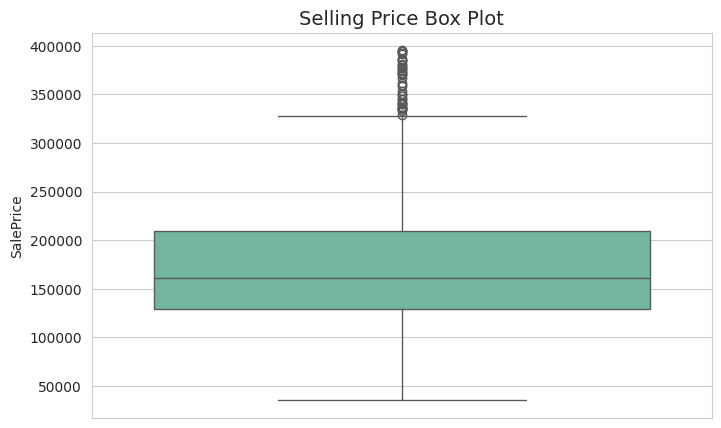

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2_train['SalePrice'])


plt.title("Selling Price Box Plot", fontsize=14)

plt.show()


In [62]:
df2_train.shape

(1432, 68)

In [63]:
X = df2_train.drop(["SalePrice"], axis = 1)
y = df2_train["SalePrice"]

In [64]:
num_features = X.select_dtypes(include="number").columns
cat_features = X.select_dtypes(include="O").columns

In [65]:
len(num_features)

34

In [66]:
len(cat_features)

33

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [68]:
landslope_order = ["Gtl" , "Mod" ,"Sev"]
qual_order_1 = [ "Ex" , "Gd" , "TA" , "Fa" , "Po"]
qual_order_2 = [ "Ex" , "Gd" , "TA" , "Fa"]
qual_order_3 = [ "Gd" , "TA" , "Fa" , "Po"]

qual_order_1_0 = [ "NA","Ex" , "Gd" , "TA" , "Fa" , "Po"]
qual_order_2_0 = [ "NA","Ex" , "Gd" , "TA" , "Fa"]
qual_order_3_0 = [ "NA","Gd" , "TA" , "Fa" , "Po"]

bsmtexposure_order = ["Gd" ,"Av" , "Mn" , "No"]
bsmtexposure_order_0 = ["NA","Gd" ,"Av" , "Mn" , "No"]
bsmtfintype1_order = ["GLQ" , "ALQ" , "BLQ" , "Rec" , "LwQ" , "Unf"]
bsmtfintype1_order_0 = ["NA","GLQ" , "ALQ" , "BLQ" , "Rec" , "LwQ" , "Unf"]
garagefinish_order_0 = ["NA","Fin" , "RFn" , "Unf"]
paveddrive_order = ["Y" , "P" ,"N"]

In [69]:
X.drop(['LandSlope','ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
        'HeatingQC', 'KitchenQual', 'GarageFinish','GarageQual','GarageCond', 'PavedDrive'],
        axis =1).select_dtypes(include="O").columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtQual', 'BsmtCond', 'CentralAir',
       'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('Scaler', StandardScaler(), num_features),

        ('onehot', OneHotEncoder(), ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']),

        ('ordinal', OrdinalEncoder(categories=[landslope_order ,qual_order_2 ,qual_order_1_0 ,qual_order_2_0 ,qual_order_3_0 ,bsmtexposure_order_0 , bsmtfintype1_order_0
                                               ,bsmtfintype1_order_0, qual_order_1, qual_order_2 ,garagefinish_order_0, qual_order_1_0, qual_order_1_0,
                                               paveddrive_order]), ['LandSlope', 'ExterQual', 'ExterCond','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                                                    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish','GarageQual',
                                                                    'GarageCond', 'PavedDrive'])
    ])

In [71]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [72]:
X_val_transformed = preprocessor.transform(X_val)

In [73]:
X_transformed = preprocessor.fit_transform(X)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

# **Modelling**

In [75]:
model=LinearRegression()
model.fit(X_train_transformed,y_train)

LinearRegression()

In [76]:
model.predict(X_val_transformed)

array([186059.78497051, 247399.05535951, 182838.39237108, 135183.59151883,
       117877.0269278 , 175337.31922518, 197844.87636593, 307316.40367289,
       122210.89008265, 231624.11140241, 209551.43438662, 153947.89266282,
       198217.11202894, 159960.28149505, 267929.81134748, 156767.28631528,
       181798.03896052, 107649.23087589, 223053.72103798, 110648.98142467,
        60377.36325142, 295421.58633217, 122609.9725243 , 147236.27213453,
       132056.91606473, 208989.09226155, 154883.04544685, 134540.52972505,
       251628.49774629,  85746.5247602 , 122241.88348403, 112917.5866014 ,
       124783.94268715, 157546.97086121, 357315.82662359, 287948.14756805,
       143179.3333901 , 100819.93238338, 278440.49688938, 194663.29433395,
       125127.96003473, 175532.66493683, 182881.77421854, 127780.0664357 ,
       127621.94215362, 143979.4476941 ,  41053.55818537, 247156.89890476,
       169899.78943287, 103247.61725878, 199854.10372121, 123567.67427256,
       166503.48719295, 1

In [77]:
y_pred=model.predict(X_val_transformed)
y_pred

array([186059.78497051, 247399.05535951, 182838.39237108, 135183.59151883,
       117877.0269278 , 175337.31922518, 197844.87636593, 307316.40367289,
       122210.89008265, 231624.11140241, 209551.43438662, 153947.89266282,
       198217.11202894, 159960.28149505, 267929.81134748, 156767.28631528,
       181798.03896052, 107649.23087589, 223053.72103798, 110648.98142467,
        60377.36325142, 295421.58633217, 122609.9725243 , 147236.27213453,
       132056.91606473, 208989.09226155, 154883.04544685, 134540.52972505,
       251628.49774629,  85746.5247602 , 122241.88348403, 112917.5866014 ,
       124783.94268715, 157546.97086121, 357315.82662359, 287948.14756805,
       143179.3333901 , 100819.93238338, 278440.49688938, 194663.29433395,
       125127.96003473, 175532.66493683, 182881.77421854, 127780.0664357 ,
       127621.94215362, 143979.4476941 ,  41053.55818537, 247156.89890476,
       169899.78943287, 103247.61725878, 199854.10372121, 123567.67427256,
       166503.48719295, 1

In [78]:
y_val.values

array([181000, 229456, 190000, 130000, 126000, 159434, 200000, 315000,
       129500, 214000, 202500, 147000, 189000, 155000, 260000, 147500,
       179900, 110000, 205000, 114500,  80000, 340000, 125000, 152000,
       127000, 190000, 153337, 144000, 248328, 100000, 127500, 112000,
       130500, 156000, 395192, 328900, 141000, 112000, 283463, 194000,
       127000, 177000, 171750, 132500, 140000, 140200,  68500, 250000,
       167500, 119000, 193500, 127000, 157000, 153000, 337000, 153500,
       315000, 193000, 134900, 139950, 125000, 185000, 131000, 213000,
       173000, 252000, 240000, 208900, 189000, 130000, 180000, 154000,
       311872, 142000, 145900, 148500, 118964, 161500, 131500, 175900,
       240000, 225000, 142500, 147000, 265979, 145000,  90000, 185500,
       149900, 119200, 240000, 185000, 144500, 260000, 196000, 161000,
       221000, 130250, 359100, 147000, 134500, 386250, 195000,  58500,
       230500, 191000,  62383,  80000, 128500, 149500, 112000, 119500,
      

In [79]:
model.score(X_train_transformed,y_train)

0.9690145876140452

In [80]:
model.score(X_val_transformed,y_val)

0.959389719822872

In [81]:
print(f"MAE: {mean_absolute_error(y_val, y_pred)}")
print(f"MSE: {mean_squared_error(y_val, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}")

MAE: 9488.409007517275
MSE: 186140775.25866172
RMSE: 13643.341792195259


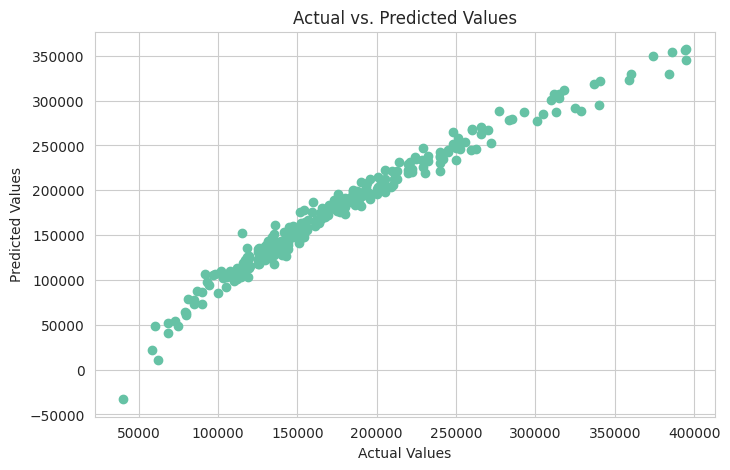

In [82]:
#scatter plot of actual test values vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [117]:
ode_cols = ['LotShape', 'LandContour','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional',
'FireplaceQu', 'GarageFinish', 'GarageQual', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC',
'ExterQual', 'BsmtCond']

ohe_cols = ['LotConfig','Neighborhood', 'Condition1','BldgType', 'HouseStyle', 'RoofStyle',
'Exterior1st', 'Exterior2nd','Foundation',  'SaleType', 'MSZoning', 'SaleCondition',
 'GarageType']

num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [119]:
col_trans = ColumnTransformer(transformers=[
    ('scalar', num_pipeline, num_cols),
    ('ordinal', ode_pipeline, ode_cols),
    ('onehot', ohe_pipeline,ohe_cols)
     ], remainder='drop', n_jobs=-1)


pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting training data
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']


In [145]:
# Preprocessing training data
X_preprocessed = pipeline.fit_transform(X)


In [146]:
# Splitting into train-test sets
X_train, X_valid, y_train, y_valid = train_test_split(X_preprocessed, y, test_size=0.3, random_state=0)


In [147]:
# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [148]:
# Evaluate on validation set
y_pred_valid = linear_model.predict(X_valid)
train_score = linear_model.score(X_train, y_train)  # Model performance on training data
valid_score = linear_model.score(X_valid, y_valid)  # Model performance on validation data

In [149]:
print(f"Training R² Score: {train_score:.4f}")
print(f"Validation R² Score: {valid_score:.4f}")

Training R² Score: 0.9518
Validation R² Score: 0.9273


In [155]:
# Add missing columns to df_test and fill with 0
missing_cols = ['SalePrice_log', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age', 'GarageYrBlt_Age']
for col in missing_cols:
    df_test[col] = 0  # or any suitable default value

In [156]:
# **Processing the actual test dataset**
df_test_preprocessed = pipeline.transform(df_test)  # Apply the same preprocessing

In [157]:
# **Make predictions on the actual test set**
y_pred_test = linear_model.predict(df_test_preprocessed)


In [158]:
# **Ensure the output size matches the test set size**
print(f"Test Predictions Shape: {y_pred_test.shape}")
print(f"Test Dataset Shape: {df_test.shape}")

Test Predictions Shape: (1459,)
Test Dataset Shape: (1459, 85)


In [159]:
# **Create submission file**
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred_test})
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")


Submission file 'submission.csv' created successfully!
